<a href="https://colab.research.google.com/github/kwasicode/alx-low_level_programming/blob/master/drag_profile_vehicles_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
import os
import zipfile

# Replace with the name of your zip file
zip_file = 'vehicles_data.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# Check the extracted contents
print(os.listdir())

['.config', 'logs', 'lowdrag.png', 'vehicles_data.zip', 'vehicles_data', 'sample_data']


In [52]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


tf.config.list_physical_devices('GPU')

[]

In [53]:
import cv2
import imghdr


data_dir = 'vehicles_data'
os.listdir(data_dir)


['low_drag', 'high_drag']

In [54]:
os.listdir(os.path.join(data_dir, 'high_drag'))

['images212.jpg',
 'images277.jpg',
 'images6.jpg',
 'images11.jpg',
 'images295.jpg',
 'images143.jpg',
 'card.jpg',
 'images283.jpg',
 '103322.jpg',
 'images318.jpg',
 'images229.jpg',
 '133699.webp',
 'be08031a885def61e3c04c9f1496eb90.jpg',
 'large7.jpg',
 'images28.jpg',
 'images287.jpg',
 'images297.jpg',
 '123711.webp',
 'image25.jpeg',
 'images273.jpg',
 '46508.webp',
 'images95.jpg',
 'image31.png',
 'images199.jpg',
 'image28.jpeg',
 'images331.jpg',
 'images325.jpg',
 'images60.jpg',
 'm1078-lmtv-on-onshape.jpg',
 'images116.jpg',
 'images34.jpg',
 'images218.jpg',
 'images134.jpg',
 'images235.jpg',
 'images105.jpg',
 '27329.webp',
 'images257.jpg',
 'E5iofDmXwAUVRI1.jpg',
 'images330.jpg',
 'images5.jpg',
 'images141.jpg',
 'images243.jpg',
 'card2.jpg',
 'images61.jpg',
 'images133.jpg',
 'images62.jpg',
 'hqdefault3.jpg',
 '94150.webp',
 '241661.jpg',
 'card4.jpg',
 'images209.jpg',
 'images249.jpg',
 'sddefault.jpg',
 'images263.jpg',
 'image11.jpeg',
 'image23.jpeg',
 '

In [55]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [56]:
import numpy as np
from matplotlib import pyplot as plt


data = tf.keras.utils.image_dataset_from_directory('vehicles_data')

Found 597 files belonging to 2 classes.


In [57]:
data_iterator = data.as_numpy_iterator()
data_iterator

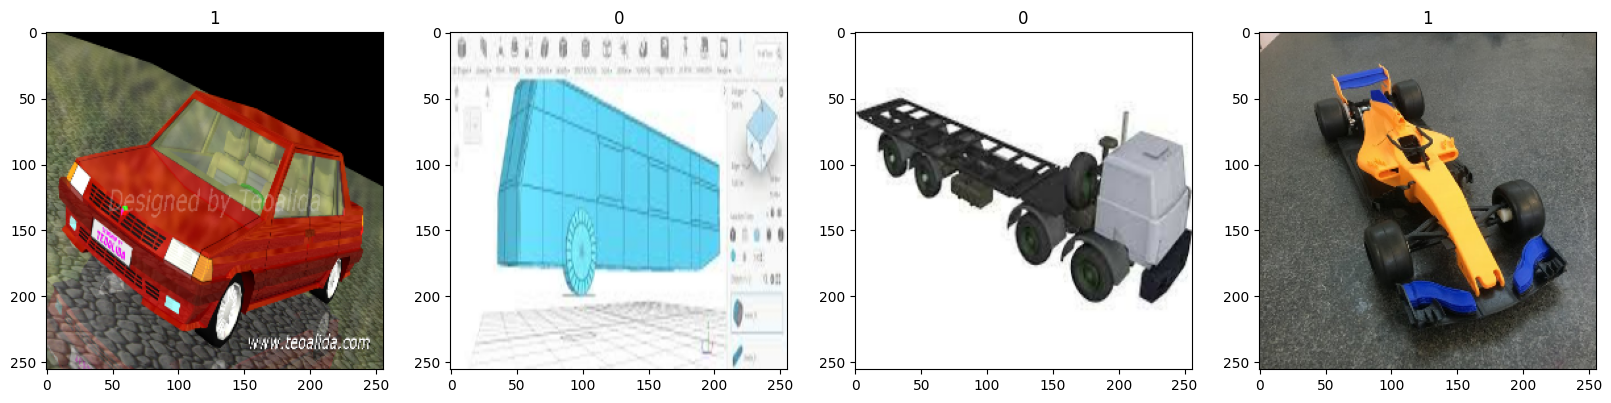

In [58]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [59]:
data = data.map(lambda x,y: (x/255, y))

In [60]:
data.as_numpy_iterator().next()

(array([[[[0.78219974, 0.92662376, 0.8995098 ],
          [0.84212625, 0.975337  , 0.95281863],
          [0.8459559 , 0.9590993 , 0.9428615 ],
          ...,
          [0.8800551 , 0.90076596, 0.93829656],
          [0.9019608 , 0.946875  , 0.98318017],
          [0.64387256, 0.6984375 , 0.74090075]],
 
         [[0.703934  , 0.84439576, 0.8191813 ],
          [0.73808354, 0.8660855 , 0.8454667 ],
          [0.75890493, 0.86906546, 0.85391104],
          ...,
          [0.9066483 , 0.92735904, 0.9567574 ],
          [0.9271441 , 0.967829  , 0.9913273 ],
          [0.6564123 , 0.71048754, 0.75180805]],
 
         [[0.6154101 , 0.7505984 , 0.7268545 ],
          [0.57891107, 0.7006745 , 0.68152624],
          [0.61221945, 0.7178649 , 0.70354915],
          ...,
          [0.93038595, 0.9510967 , 0.9730962 ],
          [0.9496826 , 0.98586524, 0.99957347],
          [0.66484517, 0.71789503, 0.7573702 ]],
 
         ...,
 
         [[0.34017932, 0.32239583, 0.29840687],
          [0.32704

In [61]:
len(data)

19

In [62]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [63]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential()

In [65]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [66]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 [==============================] - 41s 3s/step - loss: 0.7931 - accuracy: 0.4639 - val_loss: 0.6910 - val_accuracy: 0.6719
Epoch 2/20
13/13 [==============================] - 31s 2s/step - loss: 0.6712 - accuracy: 0.6562 - val_loss: 0.7302 - val_accuracy: 0.5938
Epoch 3/20
13/13 [==============================] - 33s 3s/step - loss: 0.6762 - accuracy: 0.6106 - val_loss: 0.6244 - val_accuracy: 0.7109
Epoch 4/20
13/13 [==============================] - 32s 2s/step - loss: 0.6340 - accuracy: 0.6635 - val_loss: 0.6461 - val_accuracy: 0.7109
Epoch 5/20
13/13 [==============================] - 31s 2s/step - loss: 0.5456 - accuracy: 0.7476 - val_loss: 0.4603 - val_accuracy: 0.8359
Epoch 6/20
13/13 [==============================] - 32s 2s/step - loss: 0.4484 - accuracy: 0.8125 - val_loss: 0.4271 - val_accuracy: 0.8516
Epoch 7/20
13/13 [==============================] - 36s 3s/step - loss: 0.3747 - accuracy: 0.8870 - val_loss: 0.3334 - val_accuracy: 0.8828
Epoch 8/20
13/13 [==

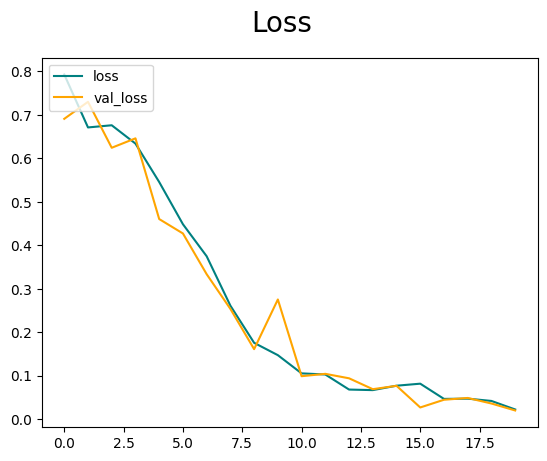

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

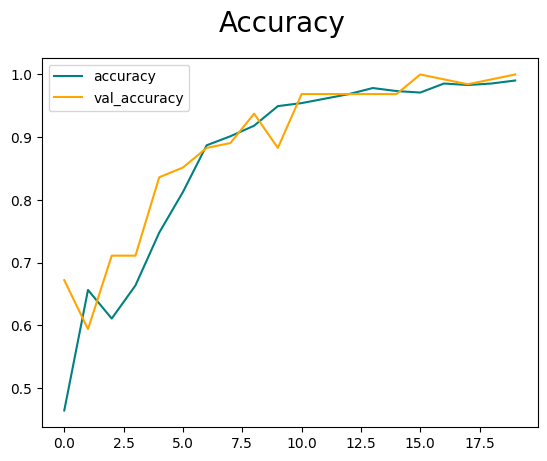

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 393ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test model

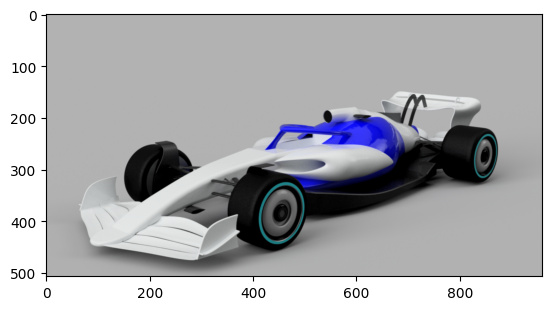

In [74]:
import cv2
img = cv2.imread('/content/lowdrag1.png')
plt.imshow(img)
plt.show()


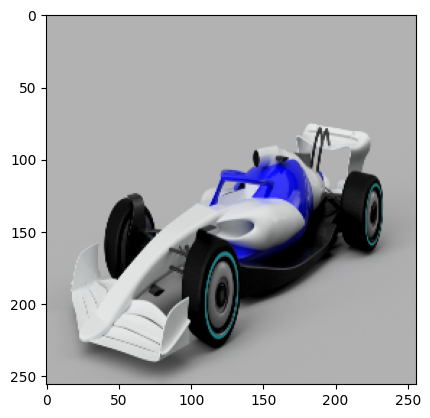

In [75]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 37ms/step


array([[0.99999815]], dtype=float32)

In [78]:

if yhat > 0.5:
    print(f'low drag vehicle shape')
else:
    print(f'High drag vehicle shape')


low drag vehicle shape


Save Deep learning model

In [79]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','drag_profile_vehicles.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/your_model_directory/drag_profile_vehicles.h5')

Mounted at /content/drive


In [ ]:
new_model = load_model('/content/drive/My Drive/your_model_directory/drag_profile_vehicles.h5')


new_model.predict(np.expand_dims(resize/255, 0))